In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline, BSpline
import sklearn
from sklearn.metrics import accuracy_score

# Setting up Algorithms

In [3]:
def balance_data(data_x, data_y):
  count_diff = int(np.sum(data_y==1) - data_x.shape[0]/2)
  for i in np.where(data_y == 1)[0]:
    if count_diff<=0:
      break
    data_x[i,choices] = 0
    data_y[i] = 0
    count_diff -= 1

  return data_x, data_y


def train(data_x,data_y):
  model_indicies = np.arange(0,data_x.shape[1])

  for i in np.where(data_y == 1)[0]:
    new_list = np.where(data_x[i] == 1)[0]
    model_indicies = np.intersect1d(model_indicies, new_list)

  return model_indicies

def test(model_indicies, data_test_x, data_test_y):

  preds = np.zeros(data_test_y.shape[0],)

  for i in range(data_test_x.shape[0]):
    if np.all(data_test_x[i,model_indicies]) == True:
      preds[i] = 1

  return accuracy_score(data_test_y,preds)

  
def create_data(number_examples, choices = None, dim= 1000):

  x_data = np.random.rand(number_examples,dim)
  x_data = np.where(x_data>0.0005,1,0)
  y_data = np.where(np.sum(x_data[:,choices],axis = 1) >= choices.shape[0],1,0)

  return x_data, y_data

# Creating Data Example

In [4]:
## Creating Data Constants

dimension = 1500 # Number of possible variables in the target function, n


l = 3  # Number of variables in the target function, k

num_training_examples = 300
num_testing_examples = int(num_training_examples*4)

epsilon = 0.76


choices = np.random.choice(dimension, l, replace=False)   ## It chooses the target functions variables randomly



In [5]:
### Creating data example

x_data = np.random.rand(num_training_examples,dimension)
x_data = np.where(x_data>0.0005,1,0)
y_data = np.where(np.sum(x_data[:,choices],axis = 1) >= l,1,0)

### Balancing the data so that we have 1/2 label-0 and 1/2 with label-1
count_diff = int(np.sum(y_data==1) - num_training_examples/2)
for i in np.where(y_data == 1)[0]:
  if count_diff<=0:
    break
  x_data[i,choices] = 0
  y_data[i] = 0
  count_diff -= 1

In [6]:
print('Number of positive examples in the training: ',np.sum(y_data==1))
print('Number of negative examples in the training: ',np.sum(y_data==0))

Number of positive examples in the training:  150
Number of negative examples in the training:  150


In [7]:
print('The chance of a variable being 0 in the training data: ',np.sum(x_data[0,:]==0)/np.sum(x_data[0,:].shape[0]))

The chance of a variable being 0 in the training data:  0.002


In [8]:
print('The target function has the following variables(indicies) active: ',choices)

The target function has the following variables(indicies) active:  [998 421 342]


# Training/testing - Plotting


----- With  100  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.055
Distribution of testing accuracy after running 200 simulations:


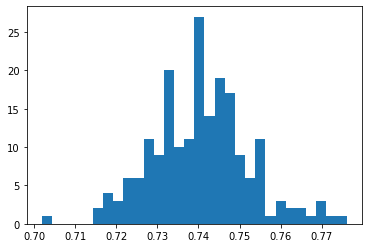

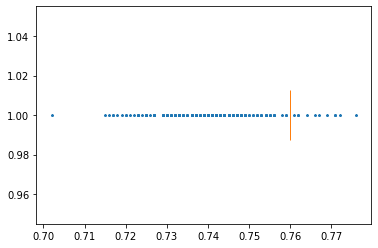

----- With  200  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.15
Distribution of testing accuracy after running 200 simulations:


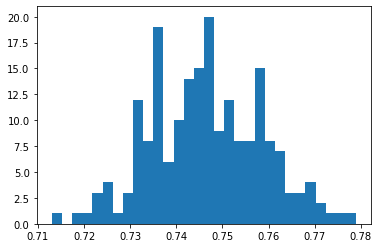

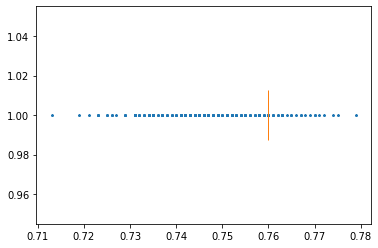

----- With  300  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.195
Distribution of testing accuracy after running 200 simulations:


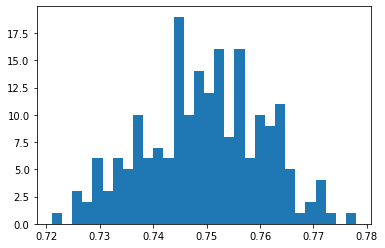

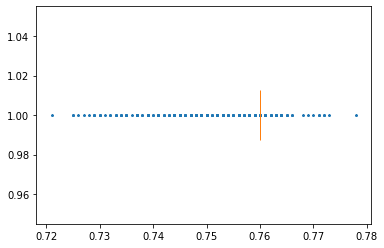

----- With  400  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.315
Distribution of testing accuracy after running 200 simulations:


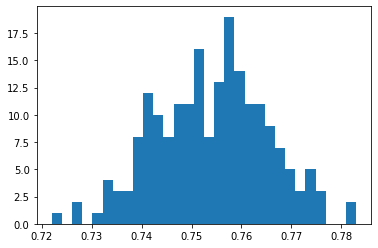

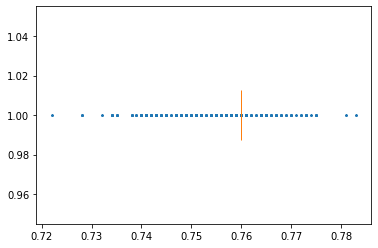

----- With  500  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.465
Distribution of testing accuracy after running 200 simulations:


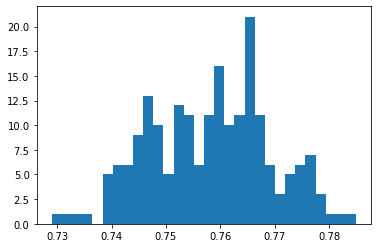

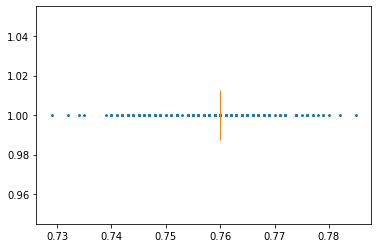

----- With  600  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.575
Distribution of testing accuracy after running 200 simulations:


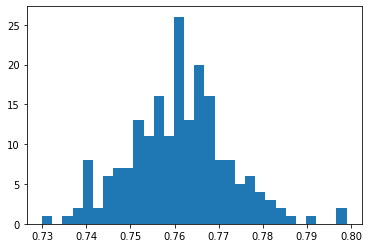

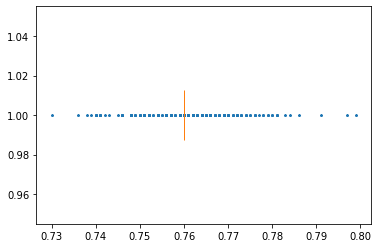

----- With  700  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.725
Distribution of testing accuracy after running 200 simulations:


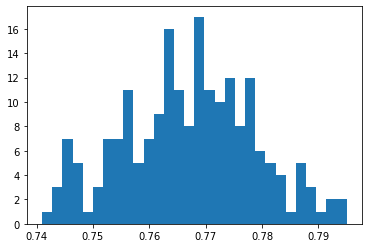

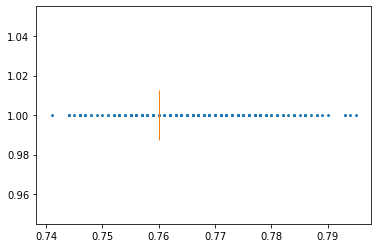

----- With  800  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.83
Distribution of testing accuracy after running 200 simulations:


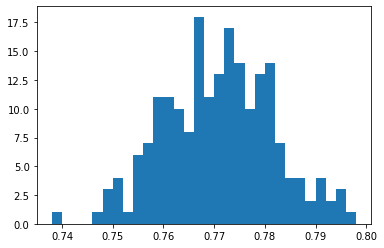

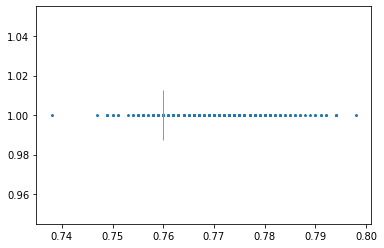

----- With  900  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.925
Distribution of testing accuracy after running 200 simulations:


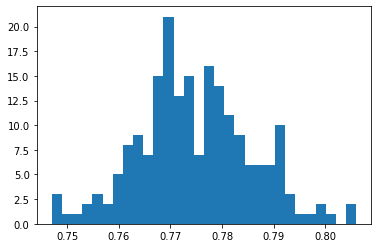

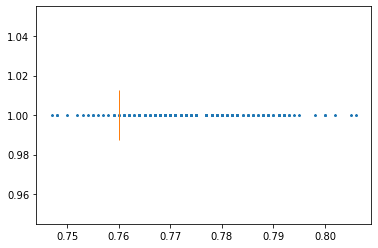

----- With  1000  training examples -----
Likelihood of the testing accuracy being more than  0.76  (1 - epsilon) is:  0.975
Distribution of testing accuracy after running 200 simulations:


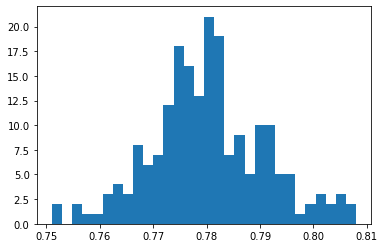

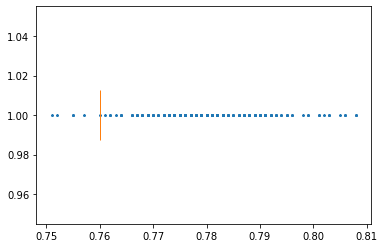

In [9]:
## Runs training and testing 500 times and records the testing accuracy for plots later

dimension = 1500 # Number of possible variables in the target function, n


l = 3  # Number of variables in the target function, k

num_training_examples_list = [100, 200, 300,400, 500, 600, 700, 800, 900, 1000]

epsilon = 0.76

choices = np.random.choice(dimension, l, replace=False)   ## It chooses the target functions variables randomly


plot_data = []


  
for num_examples in num_training_examples_list:

  accuracies= []
  for i in range(200):
    x_data, y_data = create_data(num_examples, choices,dim = dimension)  # Creating the data
    x_data, y_data = balance_data(x_data, y_data)
    
    x_data_test, y_data_test = create_data(1000, choices, dim = dimension)  # Creating the data
    x_data_test, y_data_test = balance_data(x_data_test, y_data_test)

    
    model = train(x_data,y_data)
    
    accuracy = test(model, x_data_test, y_data_test)
    
    accuracies.append(accuracy)

  accuracies = np.array(accuracies)
  print('----- With ', num_examples,' training examples -----')
  print('Likelihood of the testing accuracy being more than ',epsilon,' (1 - epsilon) is: ',accuracies[accuracies>=epsilon].shape[0]/accuracies.shape[0])

  print('Distribution of testing accuracy after running 200 simulations:')
  plt.hist(accuracies,30)
  plt.show()

  y = np.ones(np.shape(accuracies))   
  plt.plot(accuracies,y,'*',ms = 2.5)  # Plots all the testing accuracies
  plt.plot([epsilon],[1],'|',ms = 50) # This is where epsilon lies
  plt.show()
    

  plot_data.append(accuracies[accuracies>=epsilon].shape[0]/accuracies.shape[0])
  





Text(0.5, 0, 'Number of training examples')

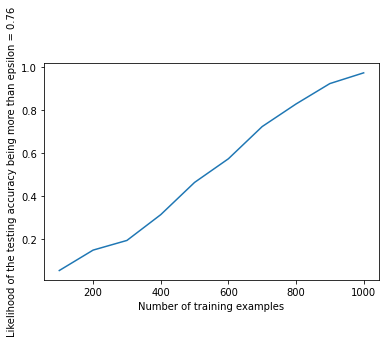

In [10]:
# Plotting the likelihood of the testing accuracy being more than epsilon = 0.76 vs. number of examples

plt.plot(num_training_examples_list, plot_data)
plt.ylabel('Likelihood of the testing accuracy being more than epsilon = '+ str(epsilon))
plt.xlabel('Number of training examples')